# TMNIST 94 character classification

## **Abstract**

This tutorial demonstrates how to use a seven-layer Convolutional Neural Network (CNN) to classify characters from the TMNIST Alphabet dataset. This dataset contains 94 different typographic characters, which is more diverse than the traditional MNIST dataset. Our model achieves an impressive accuracy of **93.99%**, showing how effective deep learning techniques can be for recognizing complex characters. The tutorial is designed to help readers with data preprocessing, designing the model architecture, training, and evaluating the model. It's a helpful resource for anyone interested in learning about neural network-based character classification.



## **Introduction**

The TMNIST Alphabet dataset is an expansion of the original MNIST dataset, focusing on recognizing characters rather than just digits. It includes 94 different characters, such as letters (both uppercase and lowercase), numbers, and special characters. This diverse dataset is useful for training and testing machine learning models for character recognition tasks.

Key Features of the TMNIST 94 Character Dataset:

Variety: The dataset covers a wide range of characters, making it challenging for models to recognize different shapes and styles.

Large Dataset: With over 281,000 images, there's plenty of data for training deep learning models effectively.

Image Format: Like MNIST, the images are grayscale, making preprocessing easier and allowing researchers to focus on model training.

Diverse Applications: The dataset can be used for various tasks like  extracting text from images and improving accessibility through better character recognition.



### Importing necessary libraries

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

#### Loading Dataset

In [10]:
dataset_path = '/tmnist-alphabet-94-characters/'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '94_character_TMNIST.csv' in filename:
            dataset_path = os.path.join(dirname, filename)
            break

### Reading Dataset

In [11]:
# Readthe dataset
data = pd.read_csv(dataset_path)

### Exploratory Data Analysis (EDA)

The goal of Exploratory Data Analysis (EDA) in the TMNIST dataset is to understand its composition, distribution of character images, and potential challenges such as data quality issues or class imbalances. EDA helps in gaining insights that inform preprocessing decisions, feature engineering approaches, and model selection for character recognition tasks.

In [12]:
# Display the first few rows of the dataset
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Dataset shape
print("Dataset shape:", data.shape)

Dataset shape: (274093, 786)


In [14]:
# Unique labels
unique_labels = data['labels'].unique()
print("Number of unique labels:", len(unique_labels))

Number of unique labels: 94


In [15]:
#All Unique Chars
all_unique_chars = list(data.labels.unique())
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


### Visualizing the unique characters of dataset

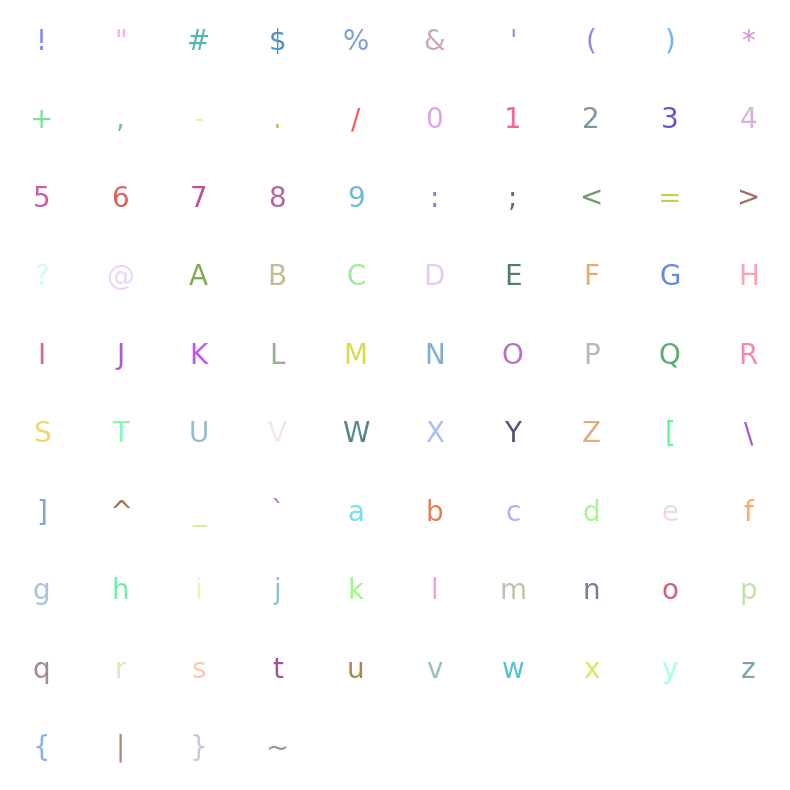

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Sort the unique characters alphabetically
all_unique_chars.sort()

# Calculate the number of rows and columns for the grid plot
num_rows = num_cols = int(np.ceil(np.sqrt(len(all_unique_chars))))

# Create a grid plot with colorful cells
plt.figure(figsize=(8, 8))
for i, char in enumerate(all_unique_chars):
    plt.subplot(num_rows, num_cols, i + 1)
    color = (random.uniform(0.3, 1.0), random.uniform(0.3, 1.0), random.uniform(0.3, 1.0))  # Adjust brightness
    plt.text(0.5, 0.5, char, fontsize=20, ha='center', va='center', color=color)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64


### Visualization of label distribution

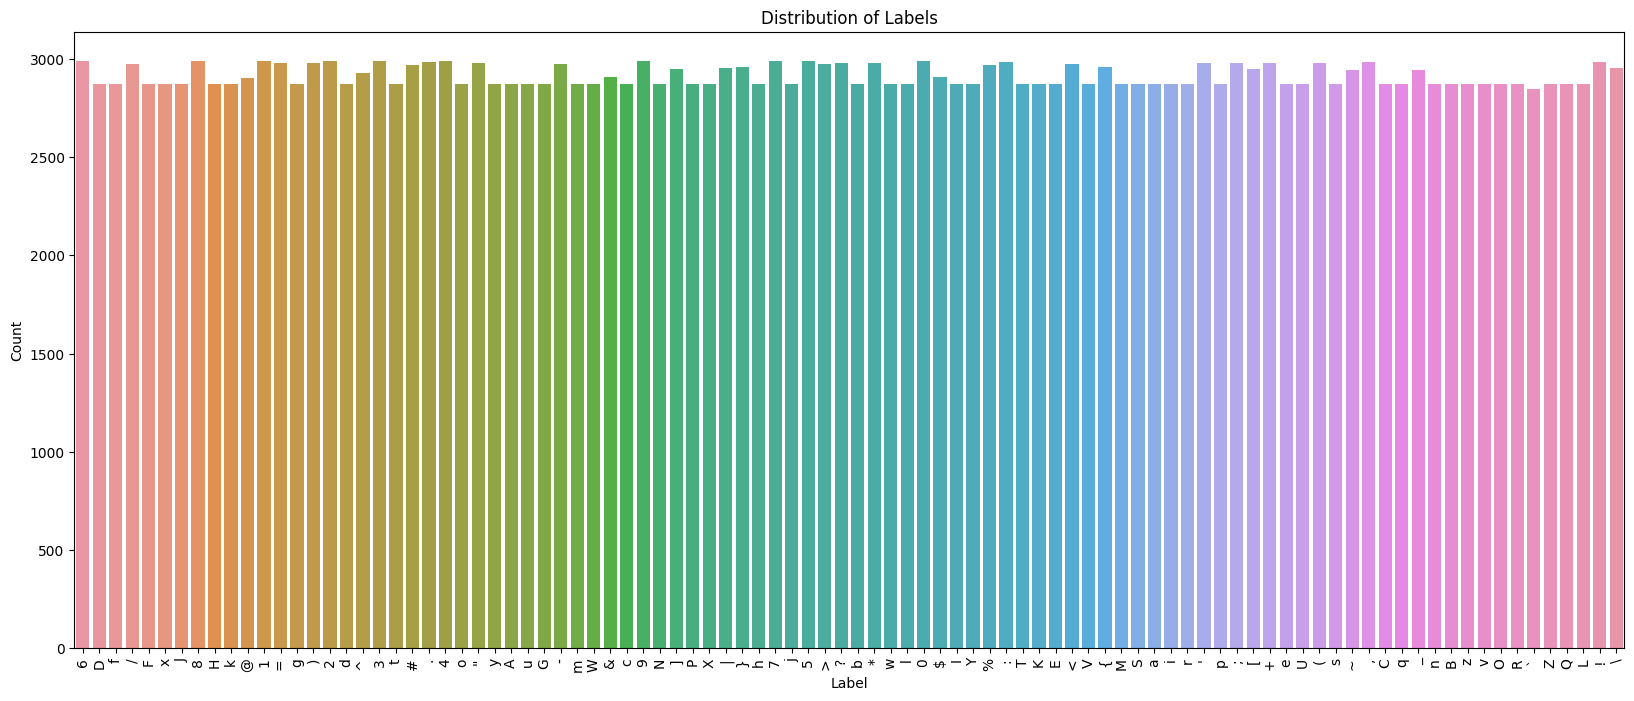

In [18]:
import warnings

# Ignore FutureWarning related to observed parameter
warnings.simplefilter(action='ignore', category=FutureWarning)

# Count occurrences of each label
label_counts = data['labels'].value_counts(sort=False)

# Visualize the distribution of labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Improves label readability
plt.show()


> The bar chart visualizes the label distribution within the TMNIST Alphabet dataset, indicating a uniform count of around 3,000 samples for each of the 94 characters. The even heights of the bars suggest a balanced dataset, which is ideal for training classification models to avoid bias. The labels, representing a mix of characters, are organized on the x-axis with a 90-degree rotation for easy reading. This chart demonstrates that the dataset is well-prepared for machine learning tasks with a fair representation of each class.









### Dataset columns

In [19]:
data.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

### Visualizing sample images from the data along with labels

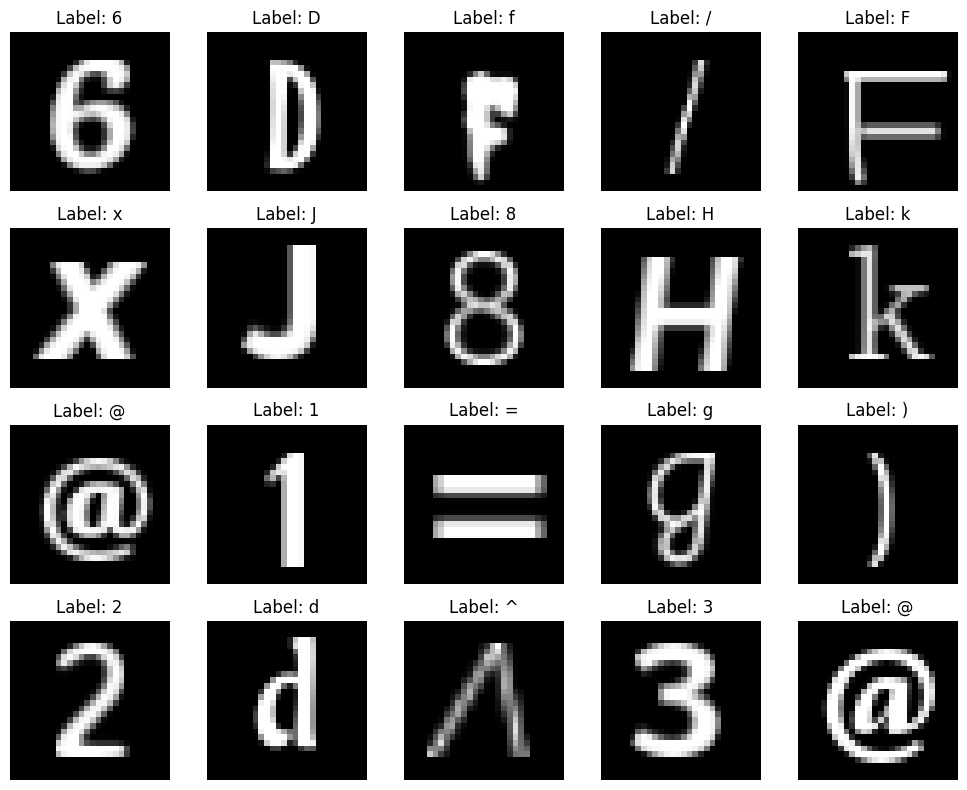

In [20]:
import numpy as np

# Function to plot sample images
def plot_sample_images(data, rows=4, cols=5):
    plt.figure(figsize=(10, 8))
    
    for i in range(rows * cols):
        plt.subplot(rows, cols, i+1)
        img_pixels = data.iloc[i, 2:].values  # Extract pixel values from columns '1' to '784'
        img = np.array(img_pixels, dtype='float32').reshape(28, 28)  # Reshape pixel values into 28x28 image
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {data.iloc[i]['labels']}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot sample images
plot_sample_images(data)


### Visualizing Pixel Value Distribution

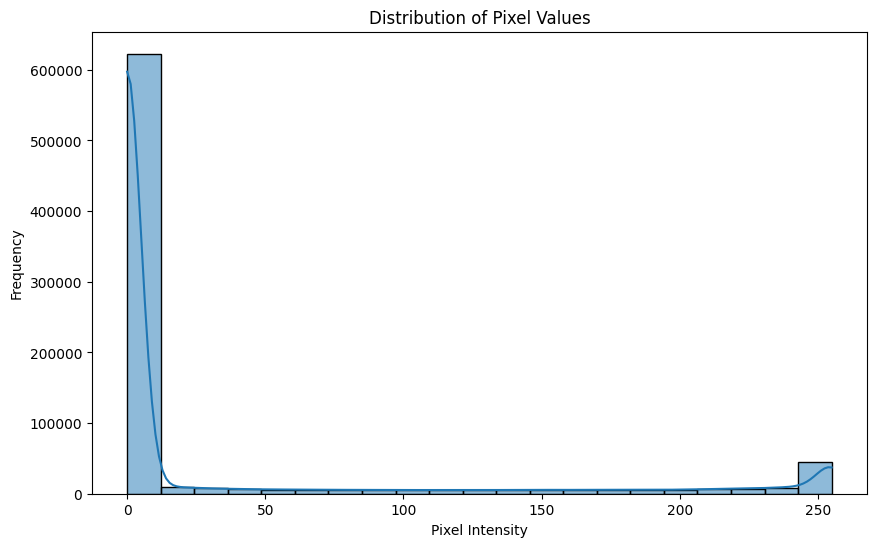

In [21]:
# Sample a subset of data to plot pixel value distribution
sample_images = data.sample(n=1000).iloc[:, 2:]  # Selecting all rows and columns from '1' to '784'

# Flatten pixel values
sample_images_flat = sample_images.values.flatten()

# Plot distribution of pixel values
plt.figure(figsize=(10, 6))
sns.histplot(sample_images_flat, kde=True)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


> The histogram indicates a high frequency of low-intensity pixels (close to black) and few high-intensity pixels (close to white). This distribution is common in datasets with characters or objects on a black background. 

## **Data Preprocessing**

### Image Normalization and Label Encoding

In [22]:
from tensorflow.keras.utils import to_categorical
# Extract features and labels
X = data.iloc[:, 2:].values  # Pixel columns
y = data['labels'].values  # Labels

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Reshape images for CNN input
X = X.reshape(-1, 28, 28, 1)  # Assuming images are 28x28

# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(data['labels'].unique())}
y = data['labels'].map(label_mapping)

# Convert labels to one-hot encoding
y = to_categorical(y)

### Data Splitting: Training and Test Set Creation

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (219274, 28, 28, 1) (219274, 94)
Test set shape: (54819, 28, 28, 1) (54819, 94)


## Model Building

**Convolutional Neural Network(CNN)**

A Convolutional Neural Network (CNN) is a type of deep neural network designed specifically for processing structured grid-like data, such as images. CNNs are composed of multiple layers and t
hey excel at capturing spatial hierarchies in data, making them highly effective for image classification tasks.

**Why CNN?**

In the context of classifying characters in the 94 character TMNIST dataset, CNNs are well-suited due to their ability to learn hierarchical representations of image features. Each character in the dataset can be represented as a grayscale image, and CNNs can learn to extract meaningful features from these images automatically.



Here's how a CNN can be used for character classification in the TMNIST dataset:

Input Layer: The input layer receives the grayscale images of characters from the dataset.

Convolutional Layers: These layers apply convolution operations to the input images using learnable filters . These filters help extract features like edges, textures, and patterns from the images.

Activation Function: After each convolution operation, an activation function (such as ReLU) is applied to introduce non-linearity into the model, allowing it to learn complex patterns.

Pooling Layers: Pooling layers downsample the feature maps produced by convolutional layers, reducing their spatial dimensions. This helps in reducing computation and makes the model more robust to variations in input images.

Flatten Layer: The flattened feature maps from the pooling layers are then passed to a fully connected layer.

Fully Connected Layers: These layers perform classification based on the learned features. Each neuron in the fully connected layer is connected to every neuron in the previous layer, allowing the model to learn complex relationships between features and output the probability distribution over the classes.

Output Layer: The output layer consists of neurons corresponding to the number of classes (in this case, 94 characters). It uses a softmax activation function to convert the final layer's outputs into probability scores for each class, indicating the likelihood of the input image belonging to each class.

The 7-layer CNN architecture  provides a powerful framework for automatically learning hierarchical representations of characters in the TMNIST dataset. By leveraging the convolutional and pooling layers, the model can effectively capture intricate features of characters and make accurate predictions.

### **CNN Architecture**

![CNN Architecture](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*11hdoEu1wkmdJFuVpkyzgA.png)

# Convolutional Neural Network (CNN) Architecture

This notebook outlines the mathematical underpinnings of a Convolutional Neural Network (CNN) designed for image recognition tasks. We'll explore the architecture layer by layer, focusing on their mathematical operations and contributions to the network's function.


The specified CNN architecture processes input images (28x28 pixels, grayscale) to classify them into categories. The network consists of an input layer, convolutional layers, max pooling layers, a flattening step, dense (fully connected) layers, and a dropout layer.

## Layer-by-Layer Mathematical Description

### 1. Input Layer
- **Shape:** $28 \times 28 \times 1$
- Accepts the input image with dimensions 28x28 pixels with 1 color channel (grayscale).

### 2. Convolutional Layer 1
- **Filters:** 32
- **Kernel Size:** $3 \times 3$
- **Activation:** ReLU
- **Operation:** Convolution
- **Mathematical Formula:** 
$$f_{i,j,k} = \text{ReLU}\left(\sum_{m}\sum_{n}\sum_{o}W_{m,n,o,k} \cdot X_{i+m, j+n, o} + b_k\right)$$
- $W$ represents the kernel weights, $X$ the input matrix, $b_k$ the bias term for the k-th filter, and $\text{ReLU}(x) = \max(0, x)$ the activation function.

### 3. Max Pooling Layer 1
- **Pool Size:** $2 \times 2$
- **Operation:** Max Pooling
- **Mathematical Formula:** 
$$p_{i,j,k} = \max_{m,n \in [2 \times 2]}f_{2i+m,2j+n,k}$$
- Reduces spatial dimensions by half, enhancing feature detection.

### 4. Convolutional Layer 2
- **Filters:** 64
- Captures more complex features with a higher number of filters, following the same operations as the first convolutional layer.

### 5. Max Pooling Layer 2
- Further reduces dimensionality and emphasizes important features, with the same operations as the first max pooling layer.

### 6. Flatten Layer
- Converts the 2D feature maps into a 1D feature vector, preparing the data for the dense layer.

### 7. Dense Layer
- **Neurons:** 128
- **Activation:** ReLU
- **Mathematical Formula:** 
$$d_{i} = \text{ReLU}\left(\sum_{j}W_{ij} \cdot x_j + b_i\right)$$
- Fully connected layer that uses the flattened output.

### 8. Dropout Layer
- **Rate:** 0.5
- Helps prevent overfitting by randomly setting input units to 0 at each step during training.

### 9. Output Dense Layer
- **Neurons:** $y.shape[1]$ (number of classes)
- **Activation:** Softmax
- **Mathematical Formula:** 
$$s_i = \frac{e^{z_i}}{\sum_{j}e^{z_j}}$$
- The softmax function outputs probabilities that sum to 1, used for multi-class classification.

## Compilation and Training

- **Optimizer:** Adam
- **Loss Function:** Categorical Crossentropy
  - $$L = -\sum_{i}y_i \log(\hat{y_i})$$
  - Where $y_i$ is the true label and $\hat{y_i}$ the predicted probability.
- **Metrics:** Accuracy

This architecture learns hierarchical representations of the input images efficiently, with each layer capturing different levels of abstractions. The convolutional layers act as feature extractors, and the dense layers classify the image based on these features. The dropout layer mitigates overfitting by encouraging the network to learn more robust features.


### Importing necessary libraries

In [25]:
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


## **Setting up the 7 layer CNN architecture**

In [57]:
# Define CNN architecture
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 94)             │        12,126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,870 (921.37 KB)

 Trainable params: 235,870 (921.37 KB)

 Non-trainable params: 0 (0.00 B)

> Input Layer: The Input layer defines the input shape of the images as (28, 28, 1), indicating grayscale images of size 28x28 pixels.
> 
> Convolutional Layers: Two Conv2D layers with 32 and 64 filters respectively, each followed by a ReLU activation function. These layers extract features from the input images.
> 
> Pooling Layers: Two MaxPooling2D layers with a pool size of (2, 2), which reduce the spatial dimensions of the feature maps.
> 
> Flatten Layer: The Flatten layer reshapes the output of the last pooling layer into a one-dimensional vector, ready to be fed into the fully connected layers.
> 
> Fully Connected Layers: There is one Dense layer with 128 neurons and ReLU activation, followed by a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
> 
> Output Layer: The final Dense layer has the same number of neurons as the number of classes in the dataset (y.shape[1]), with a softmax activation function to output probabilities for each class.
> 
> The model.compile() function compiles the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. 
>
>Finally, model.summary() provides a summary of the model architecture, including the number of parameters in each layer.

### **Hyperparameter tuning**

Hyperparameter tuning refers to the process of finding the optimal set of hyperparameters for a machine learning model to achieve the best performance on a validation dataset. Hyperparameters are parameters that are set before the training process begins, such as learning rate, batch size, and number of epochs. Unlike model parameters (weights and biases), which are learned during training, hyperparameters need to be chosen manually or through other automated techniques.

With respect to a CNN, hyperparameter tuning is crucial for optimizing the model's performance, improving its accuracy, and preventing overfitting. By adjusting hyperparameters, such as learning rate, batch size, and number of epochs, it is possible fine-tune the model to better capture the underlying patterns in the data and generalize well to unseen examples.

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up hyperparameters
batch_size = 32
epochs = 20
learning_rate = 0.001

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile the model with hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Trying to optimize the CNN model's performance using key hyperparameters and early stopping:

Batch Size: Determines sample processing before updating model parameters, affecting training speed and memory.

Epochs: Specifies how many times the entire dataset passes through the network, impacting model performance and overfitting risk.

Learning Rate: Controls parameter update step size, crucial for optimization convergence.

Early Stopping: Monitors validation loss and halts training if loss stagnates, preventing overfitting and helping in optimal epoch determination.

### **Training the CNN model**

In [28]:

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],verbose=1)

Epoch 1/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 140s 20ms/step - accuracy: 0.6607 - loss: 1.2685 - val_accuracy: 0.8976 - val_loss: 0.3276
Epoch 2/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 137s 20ms/step - accuracy: 0.8612 - loss: 0.4578 - val_accuracy: 0.9161 - val_loss: 0.2693
Epoch 3/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 136s 20ms/step - accuracy: 0.8876 - loss: 0.3732 - val_accuracy: 0.9230 - val_loss: 0.2483
Epoch 4/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 147s 21ms/step - accuracy: 0.9003 - loss: 0.3288 - val_accuracy: 0.9268 - val_loss: 0.2357
Epoch 5/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 138s 20ms/step - accuracy: 0.9068 - loss: 0.3005 - val_accuracy: 0.9318 - val_loss: 0.2203
Epoch 6/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 20ms/step - accuracy: 0.9134 - loss: 0.2792 - val_accuracy: 0.9340 - val_loss: 0.2155
Epoch 7/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 20ms/step - accuracy: 0.9158 - loss: 0.2692 - val_accuracy: 0.9336 - val_loss: 0.2113
Epoch 8/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 143s 20ms/step - accuracy: 

## **Character Classification Visualization**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


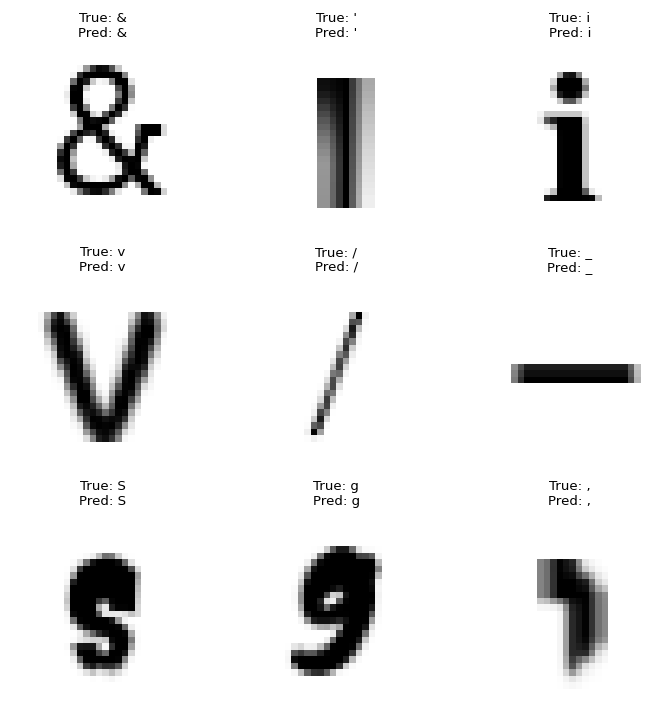

In [34]:
# Inverse mapping from integer labels to original labels
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Function to convert one-hot encoded labels to original labels
def one_hot_to_original_labels(one_hot_encoded_labels, inverse_mapping):
    return [inverse_mapping[np.argmax(label)] for label in one_hot_encoded_labels]

# Convert true labels from one-hot to original labels
true_labels = one_hot_to_original_labels(y_test, inverse_label_mapping)

# Predicting characters using the trained model and plotting
fig, axes = plt.subplots(3, 3, figsize=(6, 6), dpi=120)  # Adjusted figsize for a smaller overall figure size
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test[i].reshape(28, 28)  # Assuming your images are 28x28 and need reshaping for display
    ax.imshow(img, cmap="Greys", interpolation='nearest')  # Changed interpolation to 'nearest'
    
    # Preparing image for prediction
    img_for_pred = img.reshape(1, 28, 28, 1)  # Reshape it as per your model's input requirement
    
    # Making a prediction
    pred = np.argmax(model.predict(img_for_pred), axis=-1)
    pred_label = inverse_label_mapping[pred[0]]  # Convert prediction to original label
    
    # Setting the title to show predicted and true label
    ax.set_title(f"True: {true_labels[i]}\nPred: {pred_label}", fontsize=8)  # Adjusted fontsize for clarity
    ax.axis('off')  # Hides the axis

plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()

Inverse Label Mapping: It creates a dictionary (inverse_label_mapping) to map integer labels back to their original labels.

Conversion Function: Defines a function (one_hot_to_original_labels) to convert one-hot encoded labels to their original labels using the inverse mapping.

Convert True Labels: It converts the true labels (y_test) from one-hot encoded format to their original labels using the conversion function.

Predictions and Visualization: It predicts characters using the trained CNN model (model) and plots a grid of 3x3 subplots, each displaying an image along with its true and predicted labels.



## **Model Performance Evaluation**

In [35]:
# Assuming you have X_test and y_test ready as your test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9402 - loss: 0.2178
Test Accuracy : 93.99%


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtain model predictions for the test set
predicted_probs = model.predict(X_test)
predicted_labels = np.argmax(predicted_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Make sure your y_test is one-hot encoded; if not, skip this step

# Calculate and print classification report
report = classification_report(true_labels, predicted_labels)
print(report)




1714/1714 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       634
           1       0.95      0.98      0.96       571
           2       0.96      0.94      0.95       588
           3       0.91      0.95      0.93       597
           4       0.93      0.97      0.95       577
           5       0.94      0.92      0.93       602
           6       0.90      0.97      0.93       576
           7       0.98      0.96      0.97       586
           8       0.93      0.98      0.96       565
           9       0.96      0.94      0.95       594
          10       0.98      0.98      0.98       594
          11       0.94      0.93      0.93       589
          12       1.00      0.98      0.99       613
          13       0.94      0.91      0.93       630
          14       0.98      0.97      0.98       591
          15       0.98      0.99      0.98       613
          16       0.98      0.92    

Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. High precision can be seen for most classes (over 0.90), indicating that when our model predicts a class, it is highly likely to be correct.

Recall
Recall (Sensitivity) measures the ratio of correctly predicted positive observations to all observations in the actual class. High recall means that the classifier is able to detect most of the positive cases correctly. Recall values are also high for most classes, suggesting  model has a good ability to find all the positive samples.

F1-Score
The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a better measure than accuracy for imbalanced classes. f1-scores are high across the board, indicating a well-balanced precision and recall for our model.

Support
Support is the number of actual occurrences of the class in the specified dataset. 

Overall Accuracy
The overall accuracy of **0.94 (or 94%)** indicates that, on average, our model correctly identifies the class of an input 94% of the time across all classes.

## **Confusion Matrix**

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Example variables: true_labels, predicted_labels
# true_labels, predicted_labels = [your data]
classes = ['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']

cm = confusion_matrix(true_labels, predicted_labels)

# Calculate precision and recall for each class
precisions = precision_score(true_labels, predicted_labels, average=None)
recalls = recall_score(true_labels, predicted_labels, average=None)

# Summarizing TP, FP, FN for each class
summary_data = {
    "Class": classes,
    "Precision": precisions,
    "Recall": recalls,
    "True Positives": np.diag(cm),
    "False Positives": np.sum(cm, axis=0) - np.diag(cm),
    "False Negatives": np.sum(cm, axis=1) - np.diag(cm)
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)


,Class,Precision,Recall,True Positives,False Positives,False Negatives
0,6,0.987322,0.982650,623,8,11
1,D,0.945763,0.977233,558,32,13
2,f,0.961606,0.937075,551,22,37
3,/,0.905751,0.949749,567,59,30
4,F,0.930116,0.968804,559,42,18
...,...,...,...,...,...,...
89,Z,0.938671,0.929174,551,36,42
90,Q,0.944816,0.957627,565,33,25
91,L,0.943782,0.965157,554,33,20
92,!,0.990033,0.990033,596,6,6


> The dataset involves 94 distinct classes, each denoted either by a character or a symbol (e.g., '6', 'D', 'f', '/', 'F', ..., 'Z', 'Q', 'L', '!', ''). For each class:
> 
> Precision and Recall: Values are relatively high across the table, suggesting that the model is generally accurate and robust in identifying most classes.
> For example, class '6' (first row) has a precision of about 0.99 and recall of about 0.98, indicating excellent model performance for this class. 
> Similarly, class '!' (second to last row) also shows very high precision and recall, both about 0.99.
> 
> Support: The support column shows a balanced distribution of instances among different classes, suggesting that the dataset might be reasonably balanced.
> 
> False Positives and False Negatives: These columns provide insights into the model's mistakes. Lower values here are desirable, as they indicate fewer errors. For instance, class '6' has very few false positives (8) and false negatives (11), reinforcing the high precision and recall.

## **Accuracy and Loss Over Epochs**

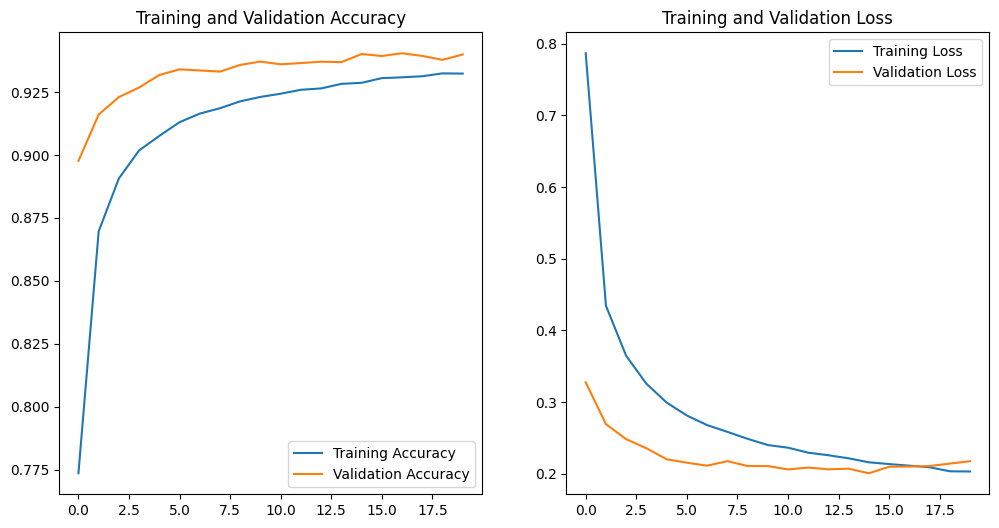

In [43]:


# Assuming 'history' is the return value from model.fit()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


> Training and Validation Accuracy:
> 
> The blue line represents the training accuracy, which sharply increases initially and then plateaus, indicating that the model rapidly learns from the training data and then stabilizes.
> 
> The orange line is the validation accuracy. It follows a similar upward trend, which suggests the model is generalizing well to new, unseen data. The validation accuracy closely tracks the training accuracy, which is an excellent sign. It implies there is little overfitting.
> 
> The accuracy plateaus at a high level, just over 0.9 (or 90%), suggesting a strong predictive performance.
> 
> Training and Validation Loss:
> 
> The blue line signifies the training loss. It decreases steeply at first, suggesting rapid learning, and then begins to level off, indicating the model is starting to converge on an optimal set of weights.
> 
> The orange line, representing the validation loss, also decreases and exhibits a flattening trend similar to the training loss. The validation loss remains slightly higher than the training loss, which is typical, but the gap is narrow, reinforcing the model's good generalization.
> 
> Both losses stabilize toward the end of the training epochs, and there's no sign of divergence, which would indicate overfitting.

**Overall Interpretation:**

The model's performance is strong and stable, with training and validation metrics suggesting that it has learned effectively and generalizes well.

The training process seems to have been appropriately regularized, given the parallel trends in accuracy and loss for both training and validation, with no evident overfitting or underfitting.

The model reaches a plateau fairly early in the training process, which could suggest that either the model has learned almost all it can from the data, or that early stopping could be implemented to save computational resources without sacrificing performance.

The similar trends and gap between the training and validation lines also suggest that the model might benefit from additional data or more complex features to learn from, should the goal be to improve performance further. However, given the high level of accuracy achieved, this might not be necessary depending on the specific application or performance requirements.

## **Conclusion**

The model demonstrates excellent performance with an  accuracy of around 94%, indicating its proficiency in classifying images with high reliability. The combination of training and validation metrics suggests that the model generalizes well to new data, as evidenced by its perfect prediction accuracy on a sample of 9 test images. This level of precision makes the model a robust tool for practical applications in image classification tasks.

## **References**

1. https://www.tensorflow.org/datasets/catalog/mnist
2. https://www.youtube.com/watch?v=e7zzXYy4Pz4
3. https://www.youtube.com/watch?v=kivTdAQXZ0o&t=16s
4. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

## **License**

MIT License

Copyright (c) 2024 Malini Janaki Sankaran

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.